In [1]:
import pandas as pd

df = pd.read_csv('iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
sample_df = df.sample(n=15)
sample_df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class
52,6.9,3.1,4.9,1.5,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
43,5.0,3.5,1.6,0.6,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor


In [5]:
sample_df['class'] = sample_df['class'].astype('category')

In [6]:
sample_df['clasb_cat'] = sample_df['class'].cat.codes
sample_df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,class,clas_cat
52,6.9,3.1,4.9,1.5,Iris-versicolor,1
116,6.5,3.0,5.5,1.8,Iris-virginica,2
43,5.0,3.5,1.6,0.6,Iris-setosa,0
59,5.2,2.7,3.9,1.4,Iris-versicolor,1
6,4.6,3.4,1.4,0.3,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
55,5.7,2.8,4.5,1.3,Iris-versicolor,1
27,5.2,3.5,1.5,0.2,Iris-setosa,0
69,5.6,2.5,3.9,1.1,Iris-versicolor,1
95,5.7,3.0,4.2,1.2,Iris-versicolor,1


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

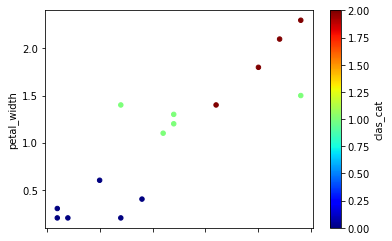

In [8]:
sample_df.plot(kind='scatter', x='sepal_length', y='petal_width', c='clas_cat', colormap='jet')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

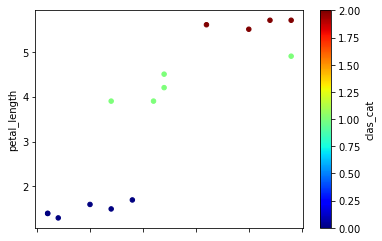

In [9]:
sample_df.plot(kind='scatter', x='sepal_length', y='petal_length', c='clas_cat', colormap='jet')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

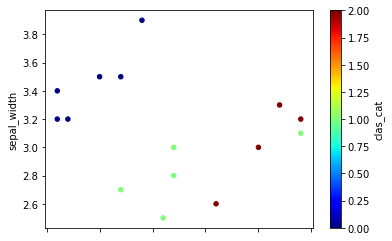

In [10]:
sample_df.plot(kind='scatter', x='sepal_length', y='sepal_width', c='clas_cat', colormap='jet')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

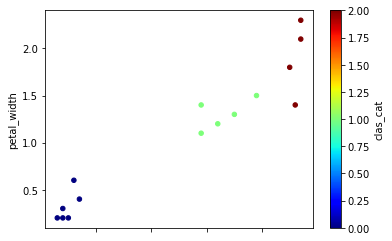

In [11]:
sample_df.plot(kind='scatter', x='petal_length', y='petal_width', c='clas_cat', colormap='jet')

In [12]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['class'] = df['class'].astype('category')
y = df['class'].cat.codes

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [15]:
y.tail()

145    2
146    2
147    2
148    2
149    2
dtype: int8

In [36]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=150)

clf_rf.fit(train_X, train_y)
y_pred = clf_rf.predict(test_X)

In [30]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(test_y, y_pred)}')

Accuracy: 0.9333333333333333


In [54]:
trees = [10, 25, 50, 75, 100, 150]
result = []
for tree in trees:
    clf_rf = RandomForestClassifier(n_estimators=tree, max_features=3)

    clf_rf.fit(train_X, train_y)
    result.append(clf_rf.predict(test_X))

In [55]:
for i, r in enumerate(result):
    print(f'Accuracy for {trees[i]} number of trees: {accuracy_score(test_y, r)}')

Accuracy for 10 number of trees: 0.9333333333333333
Accuracy for 25 number of trees: 0.9333333333333333
Accuracy for 50 number of trees: 0.9555555555555556
Accuracy for 75 number of trees: 0.9333333333333333
Accuracy for 100 number of trees: 0.9555555555555556
Accuracy for 150 number of trees: 0.9333333333333333


In [47]:
clf_rf = RandomForestClassifier(n_estimators=75)

clf_rf.fit(train_X, train_y)
y_pred = clf_rf.predict(test_X)

In [50]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [51]:
feature_imp = pd.Series(clf_rf.feature_importances_, index=names). sort_values(ascending=False)
feature_imp

petal width     0.416145
petal length    0.403235
sepal length    0.144600
sepal width     0.036020
dtype: float64

In [ ]:
clf_rf.max_depth